In [8]:
from pathlib import Path
import os

# Setup main data path
data_path = Path(r"C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset")

# Define train and test paths
train_dir = data_path / "Train"
test_dir = data_path / "Test"

# Print paths to verify
print(f"Dataset Path: {data_path}")
print(f"Train Path: {train_dir}")
print(f"Test Path: {test_dir}")

# Set your dataset path
dataset_path = r"C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset"

def walk_through_dir(dir_path):
    """Walks through dir_path and prints its structure."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        # Filter image files only
        image_files = [f for f in filenames if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        print(f"There are {len(dirnames)} directories and {len(image_files)} images in '{dirpath}'.")

#  Make sure to define the function **before** calling it
dataset_path = r"C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset"

#  Call the function after defining it
walk_through_dir(dataset_path)



Dataset Path: C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset
Train Path: C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Train
Test Path: C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Test
There are 2 directories and 0 images in 'C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset'.
There are 3 directories and 0 images in 'C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Test'.
There are 0 directories and 735 images in 'C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Test\cancer'.
There are 0 directories and 43 images in 'C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Test\leukoplakia'.
There are 0 directories and 297 images in 'C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Test\non-cancer'.
There are 3 directories and 0 images in 'C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Train'.
The

In [9]:
import os
import numpy as np

# Define main dataset directory
dataset_dir = r"C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset"

# Define train and test directories
train_dir = os.path.join(dataset_dir, "Train")
test_dir = os.path.join(dataset_dir, "Test")

# Function to load images from class subfolders
def load_images_from_directory(base_dir):
    class_folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
    class_images = {}

    for class_name in class_folders:
        class_path = os.path.join(base_dir, class_name)
        
        # Get all image files inside the class folder
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        # Store in dictionary with full file paths
        class_images[class_name] = [os.path.join(class_path, img) for img in images]

    return class_images

# Load images from Train and Test
train_images = load_images_from_directory(train_dir)
test_images = load_images_from_directory(test_dir)

# Print summary
print("\n **Train Dataset Summary:**")
for class_name, images in train_images.items():
    print(f"  - {class_name}: {len(images)} images")

print("\n **Test Dataset Summary:**")
for class_name, images in test_images.items():
    print(f"  - {class_name}: {len(images)} images")

# Example: Select a random image from Train dataset
if train_images:
    random_class = np.random.choice(list(train_images.keys()))
    if train_images[random_class]:  # Ensure the class has images
        random_image = np.random.choice(train_images[random_class])
        print(f"\n Randomly selected image from Train dataset: {random_image}")
    else:
        print(f"\n No images found in class: {random_class}")
else:
    print("\n No class folders found in Train dataset.")



 **Train Dataset Summary:**
  - cancer: 4176 images
  - leukoplakia: 264 images
  - non-cancer: 4315 images

 **Test Dataset Summary:**
  - cancer: 735 images
  - leukoplakia: 43 images
  - non-cancer: 297 images

 Randomly selected image from Train dataset: C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Train\non-cancer\non-cancer1773.jpg


Visualizing an image

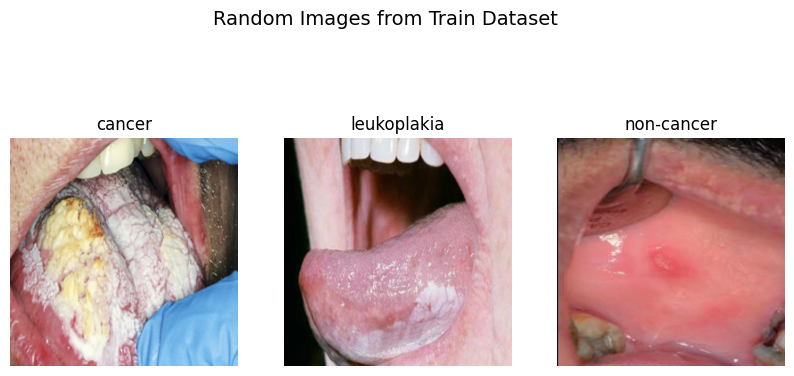

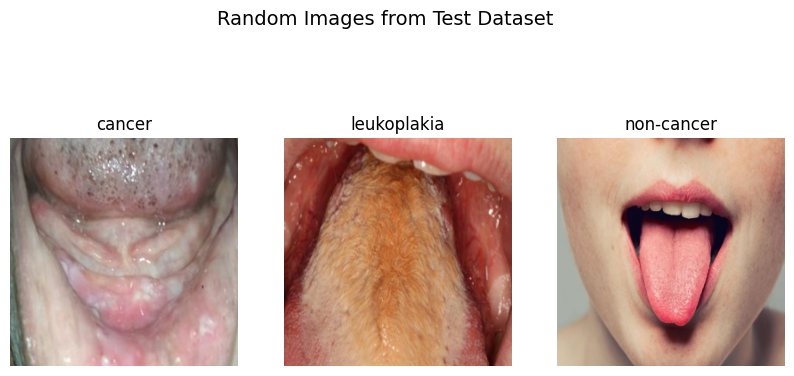

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define main dataset directory
dataset_dir = r"C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset"

# Define train and test directories
train_dir = os.path.join(dataset_dir, "Train")
test_dir = os.path.join(dataset_dir, "Test")

# Function to load images from class subfolders
def load_images_from_directory(base_dir):
    class_folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
    class_images = {}

    for class_name in class_folders:
        class_path = os.path.join(base_dir, class_name)
        
        # Get all image files inside the class folder
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        # Store in dictionary with full file paths
        class_images[class_name] = [os.path.join(class_path, img) for img in images]

    return class_images

# Load images from Train and Test
train_images = load_images_from_directory(train_dir)
test_images = load_images_from_directory(test_dir)

# Function to display random images from each class
def visualize_random_images(dataset_images, dataset_name):
    num_classes = len(dataset_images)
    
    if num_classes == 0:
        print(f"\n❌ No class folders found in {dataset_name} dataset.")
        return
    
    plt.figure(figsize=(10, 5))
    
    for i, (class_name, images) in enumerate(dataset_images.items()):
        if images:  # Ensure the class has images
            random_image = np.random.choice(images)
            
            # Load and resize the image while keeping aspect ratio
            img = Image.open(random_image)
            target_size = (256, 256)
            img.thumbnail(target_size)

            # Convert image to NumPy array
            img_as_array = np.asarray(img)

            # Plot the image
            plt.subplot(1, num_classes, i + 1)
            plt.imshow(img_as_array)
            plt.title(f"{class_name}")
            plt.axis(False)
        else:
            print(f"\n No images found in class: {class_name}")
    
    plt.suptitle(f"Random Images from {dataset_name} Dataset", fontsize=14)
    plt.show()

# Visualize images from Train and Test datasets
visualize_random_images(train_images, "Train")
visualize_random_images(test_images, "Test")


Transforming Data

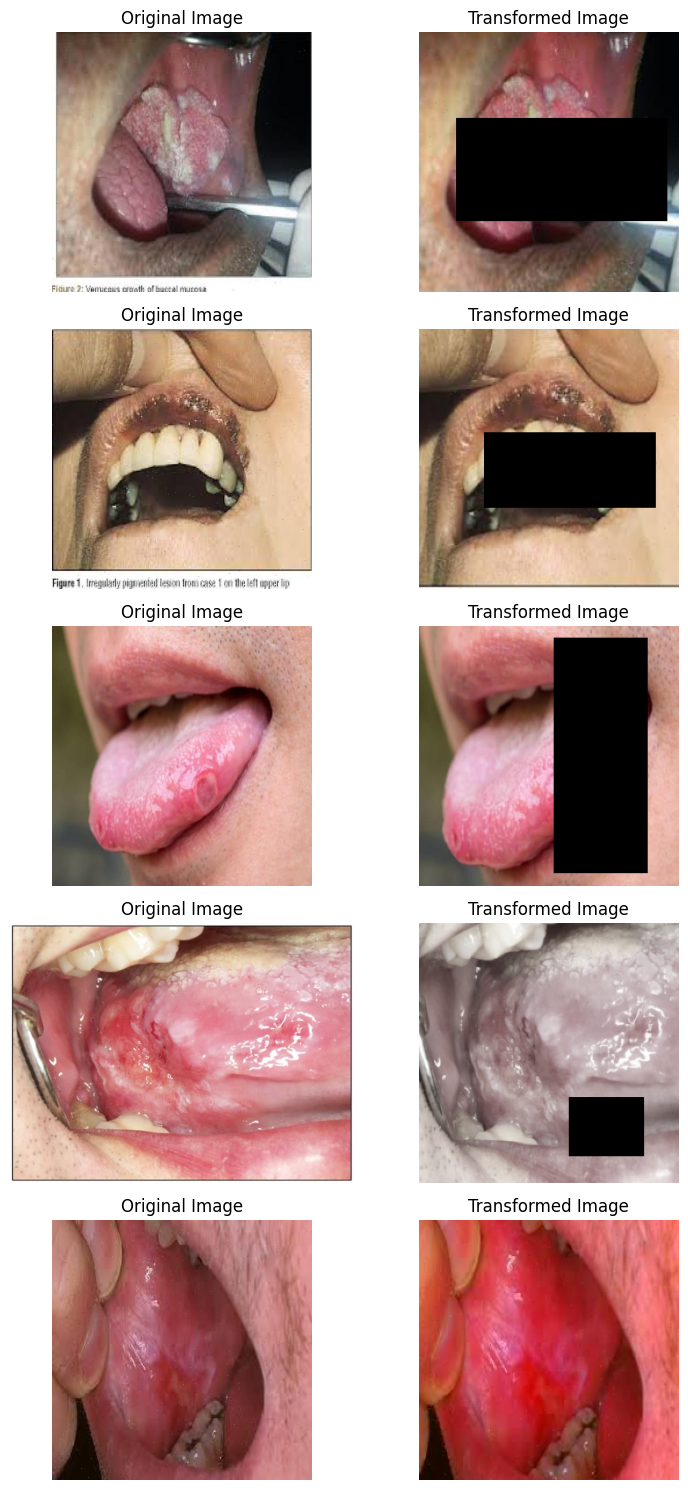

In [11]:
import os
import torch
import random
import numpy as np
from PIL import Image
from pathlib import Path
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import TrivialAugmentWide, RandomErasing
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight

# Define dataset paths
dataset_dir = Path(r"C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset")
train_dir = dataset_dir / "Train"
test_dir = dataset_dir / "Test"

# Function to get all image paths
def get_all_images(directory):
    image_paths = []
    for class_folder in directory.iterdir():
        if class_folder.is_dir():
            images = list(class_folder.glob("*.jpg")) + list(class_folder.glob("*.jpeg")) + list(class_folder.glob("*.png"))
            image_paths.extend(images)
    return image_paths

# Load images (Only once)
train_images = get_all_images(train_dir)
test_images = get_all_images(test_dir)

# Class label mapping
class_to_idx = {
    'cancer': 0,
    'non-cancer': 1,
    'leukoplakia': 2
}

# Compute Class Weights for Imbalanced Dataset
label_counts = Counter([class_to_idx[Path(img).parent.stem] for img in train_images])
all_labels = np.array(list(label_counts.elements()))  
class_weights = compute_class_weight(class_weight="balanced", classes=np.array([0, 1, 2]), y=all_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float32)  

# Define transformations (Apply only for training)
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),  
    transforms.CenterCrop(224),
    TrivialAugmentWide(),
    transforms.ToTensor(),
    RandomErasing(p=0.5, scale=(0.02, 0.33)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((256, 256)),  
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Custom Dataset Class
class OralCancerDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label_name = Path(img_path).parent.stem  
        label = class_to_idx.get(label_name, -1)  

        if label == -1:
            raise ValueError(f"Invalid class name found: {label_name}")

        # Load and transform image
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label

# Create dataset instances
train_dataset = OralCancerDataset(train_images, transform=train_transform)
test_dataset = OralCancerDataset(test_images, transform=test_transform)

# Create DataLoaders
num_workers = 4 if torch.cuda.is_available() else 0
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)

# Function to visualize transformed images
def visualize_transformed_images(dataset, num_images=5):
    fig, axes = plt.subplots(num_images, 2, figsize=(8, num_images * 3))

    mean = torch.tensor([0.485, 0.456, 0.406])
    std = torch.tensor([0.229, 0.224, 0.225])

    for i in range(num_images):
        idx = random.randint(0, len(dataset) - 1)  
        img_path = dataset.image_paths[idx]  

        original_img = Image.open(img_path).convert("RGB")
        transformed_img, _ = dataset[idx]  

        # Convert tensor to NumPy and Unnormalize
        transformed_img = transformed_img.permute(1, 2, 0).numpy()
        transformed_img = (transformed_img * std.numpy()) + mean.numpy()

        axes[i, 0].imshow(original_img)
        axes[i, 0].set_title("Original Image")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(transformed_img)
        axes[i, 1].set_title("Transformed Image")
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

# Visualize transformed images
visualize_transformed_images(train_dataset, num_images=5)



In [ ]:
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
from tqdm import tqdm

# Set reproducibility
def set_seed(seed=42):
    import random
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# Load pretrained ResNet50 and modify final layer
resnet50 = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
num_ftrs = resnet50.fc.in_features
resnet50.fc = nn.Linear(num_ftrs, 3)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet50 = resnet50.to(device)

# Loss function with class weights and label smoothing
class_weights = class_weights.to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.1)

# Optimizer and Scheduler
optimizer = optim.AdamW(resnet50.parameters(), lr=0.0005, weight_decay=5e-4)
lr_scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20, eta_min=1e-6)

# Training + Validation Loop
num_epochs = 30
best_val_acc = 0.0

for epoch in range(num_epochs):
    # Training
    resnet50.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1} Training"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet50(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total

    # Validation
    resnet50.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = resnet50(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_loss /= len(test_loader)
    val_acc = 100 * val_correct / val_total

    # Step the LR scheduler
    lr_scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']

    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(resnet50.state_dict(), r"C:\Users\tharu\OneDrive\Desktop\Image Recognition\resnet50_model.pth")
        print("✅ New best model saved.")

    # Log results
    print(f"📊 Epoch [{epoch+1}/{num_epochs}]")
    print(f"   Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"   Val Loss:   {val_loss:.4f}, Val Acc:   {val_acc:.2f}%")
    print(f"   LR: {current_lr:.6f}")
    


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\tharu/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:10<00:00, 9.39MB/s]
Epoch 1 Training: 100%|██████████| 274/274 [04:07<00:00,  1.11it/s]
C:\Users\tharu\AppData\Roaming\Python\Python312\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


✅ New best model saved.
📊 Epoch [1/30]
   Train Loss: 1.2326, Train Acc: 46.48%
   Val Loss:   1.4761, Val Acc:   50.05%
   LR: 0.000497


Epoch 2 Training: 100%|██████████| 274/274 [03:38<00:00,  1.25it/s]


✅ New best model saved.
📊 Epoch [2/30]
   Train Loss: 1.1048, Train Acc: 62.87%
   Val Loss:   1.5537, Val Acc:   52.84%
   LR: 0.000488


Epoch 3 Training: 100%|██████████| 274/274 [03:37<00:00,  1.26it/s]


✅ New best model saved.
📊 Epoch [3/30]
   Train Loss: 1.0555, Train Acc: 69.78%
   Val Loss:   1.2663, Val Acc:   82.60%
   LR: 0.000473


Epoch 4 Training: 100%|██████████| 274/274 [03:36<00:00,  1.27it/s]


📊 Epoch [4/30]
   Train Loss: 1.0375, Train Acc: 72.60%
   Val Loss:   1.2924, Val Acc:   70.60%
   LR: 0.000452


Epoch 5 Training: 100%|██████████| 274/274 [03:30<00:00,  1.30it/s]


📊 Epoch [5/30]
   Train Loss: 0.9916, Train Acc: 77.51%
   Val Loss:   1.2576, Val Acc:   80.47%
   LR: 0.000427


Epoch 6 Training: 100%|██████████| 274/274 [03:17<00:00,  1.39it/s]


✅ New best model saved.
📊 Epoch [6/30]
   Train Loss: 0.9937, Train Acc: 78.06%
   Val Loss:   1.2099, Val Acc:   84.28%
   LR: 0.000397


Epoch 7 Training: 100%|██████████| 274/274 [03:17<00:00,  1.38it/s]


📊 Epoch [7/30]
   Train Loss: 0.9805, Train Acc: 80.15%
   Val Loss:   1.4263, Val Acc:   70.33%
   LR: 0.000364


Epoch 8 Training: 100%|██████████| 274/274 [03:17<00:00,  1.39it/s]


📊 Epoch [8/30]
   Train Loss: 0.9699, Train Acc: 81.39%
   Val Loss:   1.2351, Val Acc:   80.93%
   LR: 0.000328


Epoch 9 Training: 100%|██████████| 274/274 [03:16<00:00,  1.39it/s]


✅ New best model saved.
📊 Epoch [9/30]
   Train Loss: 0.9496, Train Acc: 85.57%
   Val Loss:   1.2007, Val Acc:   87.16%
   LR: 0.000290


Epoch 10 Training: 100%|██████████| 274/274 [03:17<00:00,  1.39it/s]


📊 Epoch [10/30]
   Train Loss: 0.9436, Train Acc: 85.32%
   Val Loss:   1.2420, Val Acc:   85.02%
   LR: 0.000251


Epoch 11 Training: 100%|██████████| 274/274 [03:16<00:00,  1.39it/s]


✅ New best model saved.
📊 Epoch [11/30]
   Train Loss: 0.9252, Train Acc: 87.50%
   Val Loss:   1.1783, Val Acc:   88.65%
   LR: 0.000211


Epoch 12 Training: 100%|██████████| 274/274 [03:16<00:00,  1.40it/s]


📊 Epoch [12/30]
   Train Loss: 0.9190, Train Acc: 88.69%
   Val Loss:   1.2241, Val Acc:   87.53%
   LR: 0.000173


Epoch 13 Training: 100%|██████████| 274/274 [03:16<00:00,  1.40it/s]


✅ New best model saved.
📊 Epoch [13/30]
   Train Loss: 0.9217, Train Acc: 89.39%
   Val Loss:   1.1840, Val Acc:   88.93%
   LR: 0.000137


Epoch 14 Training: 100%|██████████| 274/274 [03:15<00:00,  1.40it/s]


✅ New best model saved.
📊 Epoch [14/30]
   Train Loss: 0.9037, Train Acc: 91.06%
   Val Loss:   1.1674, Val Acc:   90.42%
   LR: 0.000104


Epoch 15 Training: 100%|██████████| 274/274 [03:16<00:00,  1.39it/s]


✅ New best model saved.
📊 Epoch [15/30]
   Train Loss: 0.8994, Train Acc: 91.67%
   Val Loss:   1.1485, Val Acc:   91.81%
   LR: 0.000074


Epoch 16 Training: 100%|██████████| 274/274 [03:16<00:00,  1.39it/s]


📊 Epoch [16/30]
   Train Loss: 0.8872, Train Acc: 93.42%
   Val Loss:   1.1722, Val Acc:   89.40%
   LR: 0.000049


Epoch 17 Training: 100%|██████████| 274/274 [03:16<00:00,  1.39it/s]


📊 Epoch [17/30]
   Train Loss: 0.8790, Train Acc: 93.84%
   Val Loss:   1.2058, Val Acc:   87.81%
   LR: 0.000028


Epoch 18 Training: 100%|██████████| 274/274 [03:16<00:00,  1.40it/s]


📊 Epoch [18/30]
   Train Loss: 0.8905, Train Acc: 93.98%
   Val Loss:   1.1760, Val Acc:   89.12%
   LR: 0.000013


Epoch 19 Training: 100%|██████████| 274/274 [03:17<00:00,  1.39it/s]


📊 Epoch [19/30]
   Train Loss: 0.8831, Train Acc: 93.87%
   Val Loss:   1.1747, Val Acc:   88.84%
   LR: 0.000004


Epoch 20 Training: 100%|██████████| 274/274 [03:16<00:00,  1.39it/s]


📊 Epoch [20/30]
   Train Loss: 0.8871, Train Acc: 94.27%
   Val Loss:   1.1848, Val Acc:   88.47%
   LR: 0.000001


Epoch 21 Training: 100%|██████████| 274/274 [03:17<00:00,  1.39it/s]


📊 Epoch [21/30]
   Train Loss: 0.8744, Train Acc: 94.68%
   Val Loss:   1.1768, Val Acc:   88.93%
   LR: 0.000004


Epoch 22 Training: 100%|██████████| 274/274 [03:17<00:00,  1.39it/s]


📊 Epoch [22/30]
   Train Loss: 0.8703, Train Acc: 94.27%
   Val Loss:   1.1763, Val Acc:   88.47%
   LR: 0.000013


Epoch 23 Training: 100%|██████████| 274/274 [03:17<00:00,  1.39it/s]


📊 Epoch [23/30]
   Train Loss: 0.8761, Train Acc: 94.46%
   Val Loss:   1.1785, Val Acc:   88.74%
   LR: 0.000028


Epoch 24 Training: 100%|██████████| 274/274 [03:17<00:00,  1.38it/s]


📊 Epoch [24/30]
   Train Loss: 0.8773, Train Acc: 94.49%
   Val Loss:   1.1951, Val Acc:   88.47%
   LR: 0.000049


Epoch 25 Training: 100%|██████████| 274/274 [03:18<00:00,  1.38it/s]


📊 Epoch [25/30]
   Train Loss: 0.8691, Train Acc: 94.51%
   Val Loss:   1.1837, Val Acc:   89.95%
   LR: 0.000074


Epoch 26 Training: 100%|██████████| 274/274 [03:16<00:00,  1.40it/s]


📊 Epoch [26/30]
   Train Loss: 0.8887, Train Acc: 93.66%
   Val Loss:   1.2008, Val Acc:   87.16%
   LR: 0.000104


Epoch 27 Training: 100%|██████████| 274/274 [03:16<00:00,  1.39it/s]


📊 Epoch [27/30]
   Train Loss: 0.8925, Train Acc: 93.32%
   Val Loss:   1.1977, Val Acc:   88.47%
   LR: 0.000137


Epoch 28 Training: 100%|██████████| 274/274 [03:16<00:00,  1.39it/s]


📊 Epoch [28/30]
   Train Loss: 0.8959, Train Acc: 92.95%
   Val Loss:   1.2113, Val Acc:   86.33%
   LR: 0.000173


Epoch 29 Training: 100%|██████████| 274/274 [03:17<00:00,  1.39it/s]


📊 Epoch [29/30]
   Train Loss: 0.8928, Train Acc: 92.50%
   Val Loss:   1.1528, Val Acc:   91.07%
   LR: 0.000211


Epoch 30 Training: 100%|██████████| 274/274 [03:16<00:00,  1.39it/s]


📊 Epoch [30/30]
   Train Loss: 0.8991, Train Acc: 92.03%
   Val Loss:   1.1811, Val Acc:   87.81%
   LR: 0.000250


Classification Report:

              precision    recall  f1-score   support

      cancer       0.98      0.86      0.92       735
  non-cancer       0.88      0.93      0.91       297
 leukoplakia       0.28      0.77      0.42        43

    accuracy                           0.88      1075
   macro avg       0.72      0.85      0.75      1075
weighted avg       0.93      0.88      0.90      1075



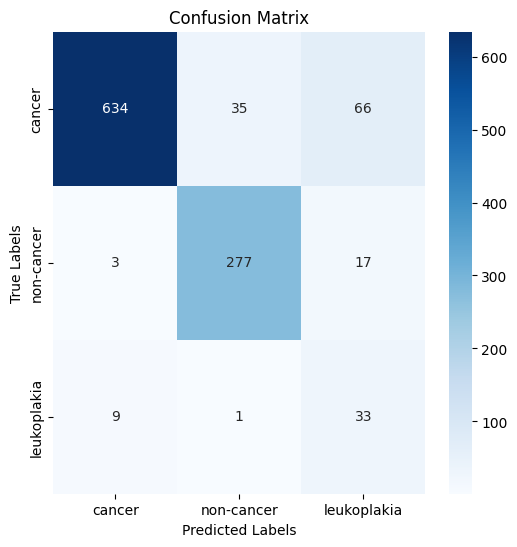

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch

#Ensure model is in evaluation mode
resnet50.eval()

#Store true labels and predictions
true_labels = []
pred_labels = []

#Disable gradient calculations for inference
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        #Get model predictions
        outputs = resnet50(images)
        _, preds = torch.max(outputs, 1)  # Convert logits to class labels

        #Store predictions & true labels
        true_labels.extend(labels.cpu().numpy())  # Move to CPU
        pred_labels.extend(preds.cpu().numpy())  # Move to CPU

#Get class names
class_names = ['cancer', 'non-cancer', 'leukoplakia']

#Generate classification report
print("Classification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=class_names))

#Generate confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

#Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
